In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/hs/Documents/Anaconda_Python_code/SD_BootCamp/LR_project/final/Aqar_Data.csv")

In [3]:
df

,District,Category,Bedrooms,Livingrooms,Bathrooms,Furnished,Kitechen,Garage,Elevator,AC,Price,Region,floor_number,AGE
0,شقة للإيجار في شارع الامير سعود بن عبدالله بن ...,family,3.0,1.0,2.0,no,yes,no,no,yes,48000.0,East,2.0,1.0
1,شقة للإيجار في شارع الشيخ عبدالله المخضوب ، حي...,family,3.0,1.0,2.0,no,yes,no,yes,yes,30000.0,East,2.0,4.0
2,شقة للإيجار في شارع قلعة صلاح الدين ، حي العقي...,family,2.0,1.0,1.0,no,yes,no,yes,yes,46000.0,East,1.0,1.0
3,شقة للإيجار في طريق الملك فهد ، حي الملقا ، ال...,family,2.0,2.0,2.0,yes,yes,no,yes,yes,14000.0,East,3.0,4.0
4,شقة للإيجار في حي القيروان ، الرياض ، الرياض,family,3.0,1.0,3.0,no,yes,no,no,yes,65000.0,East,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,شقة للإيجار في شارع الصلة ، حي السويدي ، الريا...,family,3.0,1.0,2.0,no,yes,no,no,no,20000.0,West,3.0,4.0
955,شقة للإيجار في شارع المرصفي ، حي الحزم ، الريا...,family,5.0,1.0,3.0,no,no,no,no,no,22000.0,West,2.0,4.0
956,شقة للإيجار في شارع ينبع ، حي ظهرة لبن ، الريا...,family,3.0,1.0,2.0,no,yes,no,no,no,17000.0,West,2.0,4.0
957,شقة للإيجار في شارع المجد ، حي ظهرة لبن ، الري...,family,5.0,1.0,3.0,yes,yes,no,no,no,25000.0,West,2.0,4.0


### convert the categorical feature into numerical

**I will convert the (Furnished, Kitechen, Garage, Elevator, AC) to numerical, in order perform will in modeling**

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Category_encoded = le.fit_transform(df['Category'])
df['Category_Encoded'] = Category_encoded

encoded_region = le.fit_transform(df['Region'])
df['Encoded_Region'] = encoded_region

encoded_furnished = le.fit_transform(df['Furnished'])
df['Encoded_Furnished'] = encoded_furnished

encoded_elevator = le.fit_transform(df['Elevator'])
df['Encoded_Elevator'] = encoded_elevator

encoded_ac = le.fit_transform(df['AC'])
df['Encoded_AC'] = encoded_ac

encoded_kitechen = le.fit_transform(df['Kitechen'])
df['Encoded_Kitechen'] = encoded_kitechen

encoded_garage = le.fit_transform(df['Garage'])
df['Encoded_Garage'] = encoded_garage

### Slice and select data

In [5]:
nr = df.loc[: ,['Bedrooms', 'Livingrooms', 'Bathrooms', 'Price','floor_number', 'AGE','Category_Encoded', 'Encoded_Region',
       'Encoded_Furnished', 'Encoded_Elevator', 'Encoded_AC',
       'Encoded_Kitechen', 'Encoded_Garage']]

### Visualize the correlation between the feature

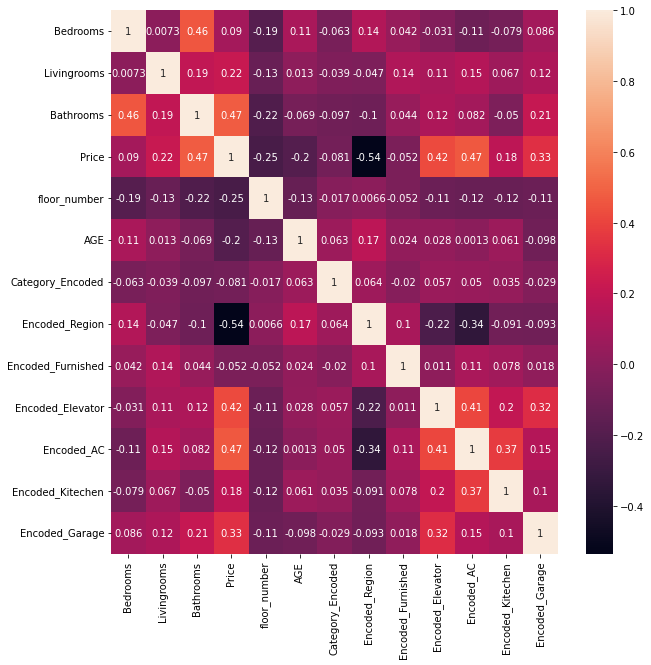

In [6]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.heatmap(nr.corr(), annot=True);

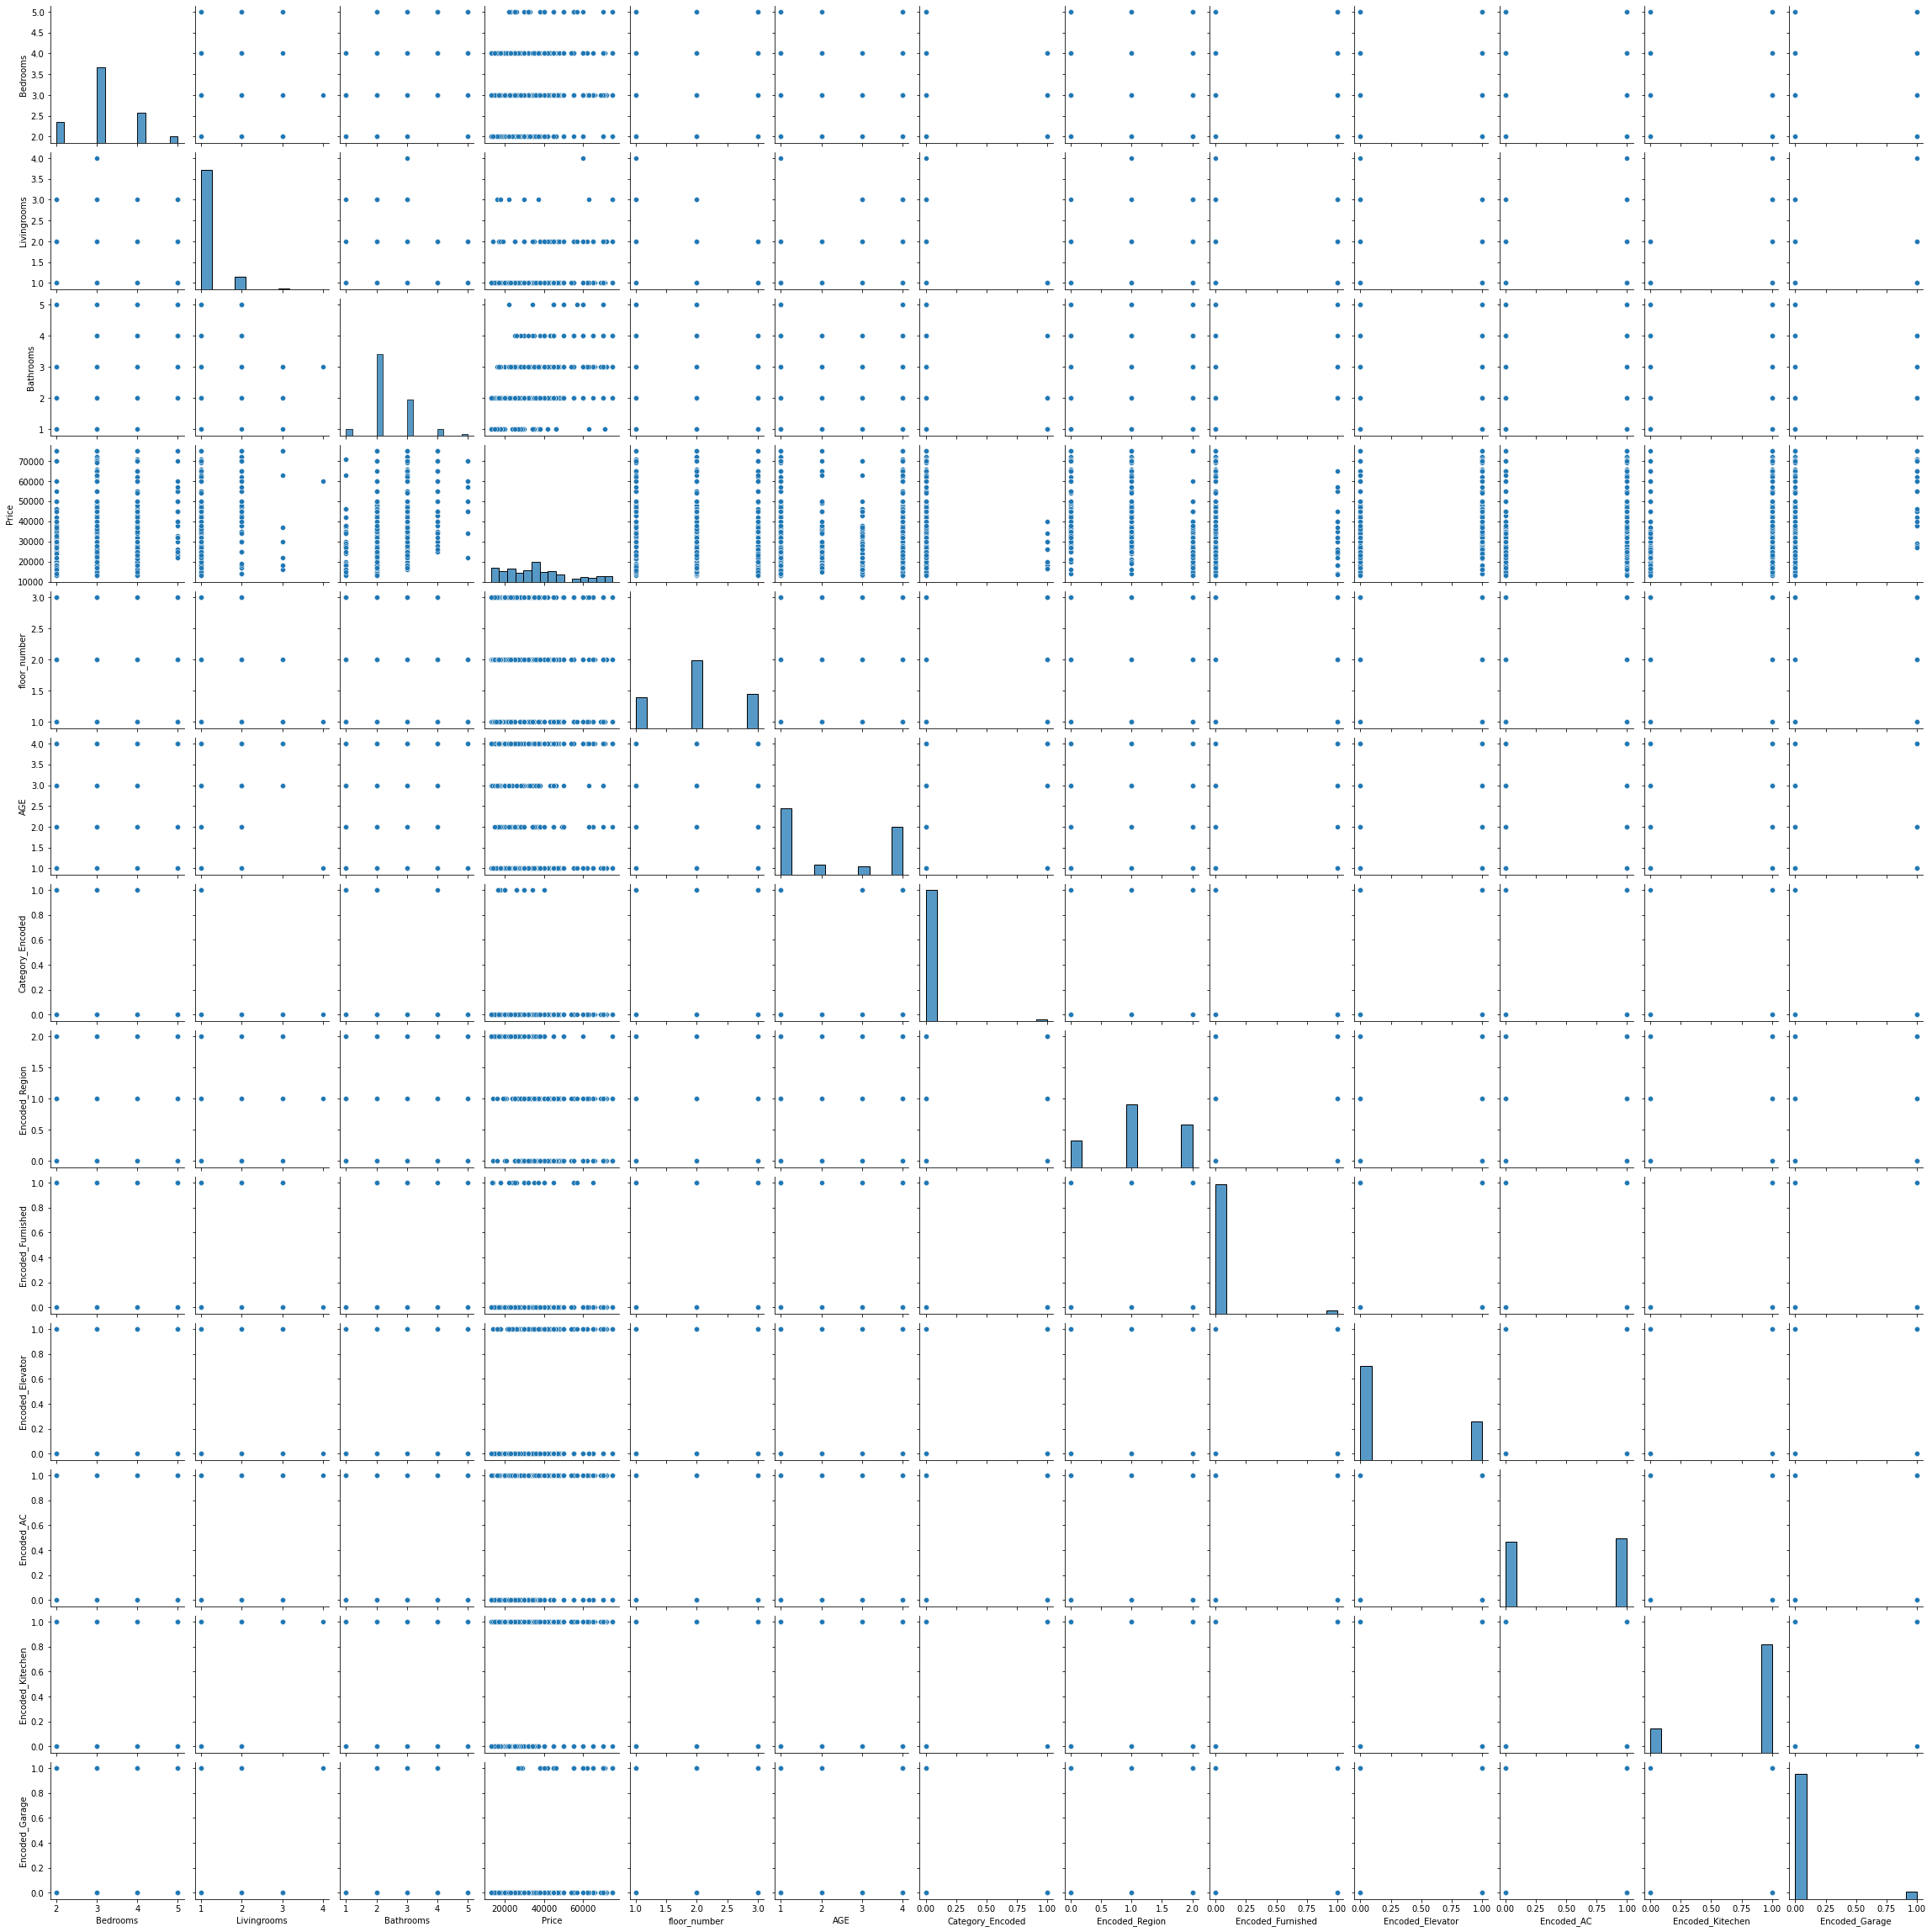

In [7]:
sns.pairplot(nr);

### Linear Regression model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X = nr.drop("Price", axis=1)
y = nr["Price"]

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.25, random_state=10)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [10]:
# define linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict on train
train_pred = lm.predict(X_train)

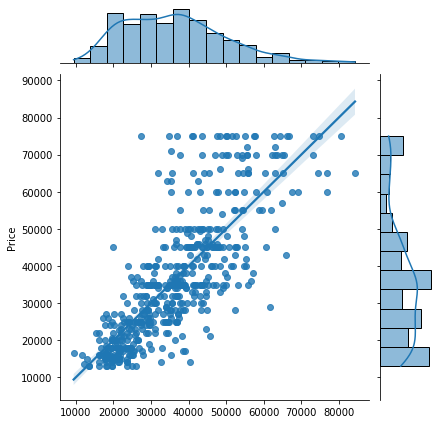

In [11]:
# visualize train predictions
sns.jointplot(x=train_pred, y=y_train, kind='reg')

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_score = lm.score(X_train,y_train)
print(f'R2 on training set: {train_score}')
rmse = mean_squared_error(y_train, train_pred, squared=False)
print(f'RMSE on training set: {rmse}')
mae = mean_absolute_error(y_train, train_pred)
print(f'MAE on training set: {mae}')

R2 on training set: 0.621383802199897
RMSE on training set: 10363.797024594838
MAE on training set: 7489.338757583671


In [13]:
# predict on validation
val_pred = lm.predict(X_val)

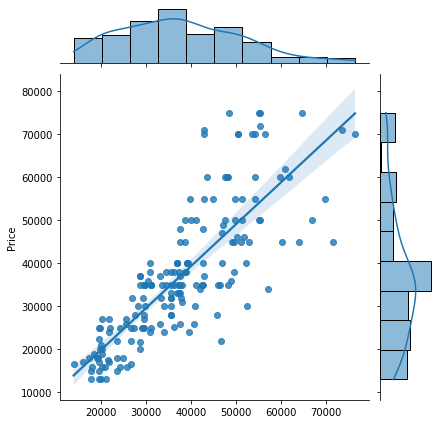

In [14]:
# visualize val predictions
sns.jointplot(x=val_pred,y=y_val, kind='reg')

In [15]:
val_score = lm.score(X_val, y_val)
print(f'R2 on validation set: {val_score}')
rmse = mean_squared_error(y_val, val_pred, squared=False)
print(f'RMSE on validation set: {rmse}')
mae = mean_absolute_error(y_val, val_pred)
print(f'MAE on validation set: {mae}')

R2 on validation set: 0.656358671090588
RMSE on validation set: 9182.896246048093
MAE on validation set: 6873.3770117340355


### Ridge linear regression model

In [16]:
# scale data for ridge model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
ss = StandardScaler()
x_train_scaled = ss.fit_transform(X_train)
x_val_scaled = ss.transform(X_val)

In [17]:
lm_reg = Ridge()

lm_reg.fit(x_train_scaled, y_train)
train_pred = lm_reg.predict(x_train_scaled)

In [18]:
lm_reg.score(x_train_scaled, y_train)
train_score = lm_reg.score(x_train_scaled, y_train)
print(f'R2 on training set: {train_score}')
rmse = mean_squared_error(y_train, train_pred, squared=False)
print(f'RMSE on training set: {rmse}')
mae = mean_absolute_error(y_train, train_pred)
print(f'MAE on training set: {mae}')

R2 on training set: 0.6213831121889288
RMSE on training set: 10363.80646836719
MAE on training set: 7490.425868582268


In [19]:
val_pred = lm_reg.predict(x_val_scaled)
val_score = lm_reg.score(x_val_scaled, y_val)
print(f'R2 on validation set: {val_score}')
rmse = mean_squared_error(y_val, val_pred, squared=False)
print(f'RMSE on validation set: {rmse}')
mae = mean_absolute_error(y_val, val_pred)
print(f'MAE on validation set: {mae}')

R2 on validation set: 0.6564243487614183
RMSE on validation set: 9182.018673989673
MAE on validation set: 6872.858639778723


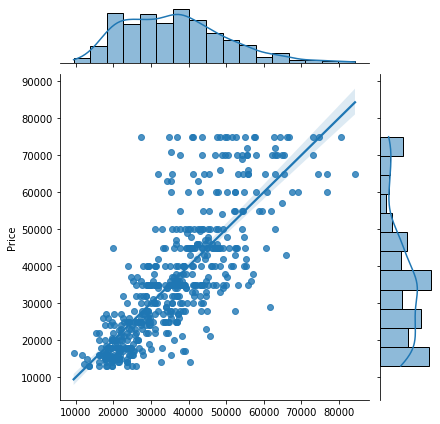

In [20]:
sns.jointplot(x=train_pred, y=y_train, kind='reg')

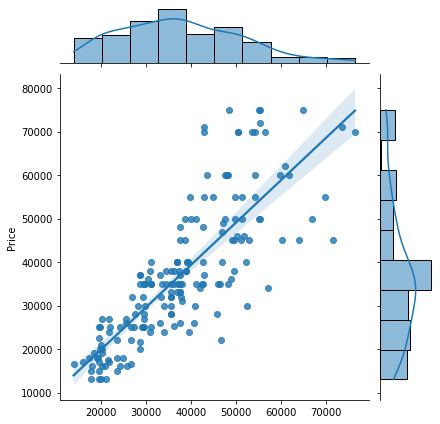

In [21]:
sns.jointplot(x=val_pred,y=y_val, kind='reg')

### Polynomial regression model

In [22]:
# transform features
from sklearn.preprocessing import PolynomialFeatures

# define a feature poly model with a degree of 2
poly = PolynomialFeatures(degree=2)

# feature transforms
x_train_poly = poly.fit_transform(X_train)
x_val_poly = poly.transform(X_val)

In [23]:
# define lm_poly model
lm_poly = LinearRegression()
lm_poly.fit(x_train_poly, y_train)
train_pred = lm_poly.predict(x_train_poly)

In [24]:
lm_poly.score(x_train_poly, y_train)
train_score = lm_poly.score(x_train_poly, y_train)
print(f'R2 on training set: {train_score}')
rmse = mean_squared_error(y_train, train_pred, squared=False)
print(f'RMSE on training set: {rmse}')
mae = mean_absolute_error(y_train, train_pred)
print(f'MAE on training set: {mae}')

R2 on training set: 0.7509015324037327
RMSE on training set: 8406.298972051349
MAE on training set: 5894.474524523694


In [25]:
val_pred = lm_poly.predict(x_val_poly)
val_score = lm_poly.score(x_val_poly, y_val)
print(f'R2 on validation set: {val_score}')
rmse = mean_squared_error(y_val, val_pred, squared=False)
print(f'RMSE on validation set: {rmse}')
mae = mean_absolute_error(y_val, val_pred)
print(f'MAE on validation set: {mae}')

R2 on validation set: 0.557198814291924
RMSE on validation set: 10423.92721045983
MAE on validation set: 7122.231371451133


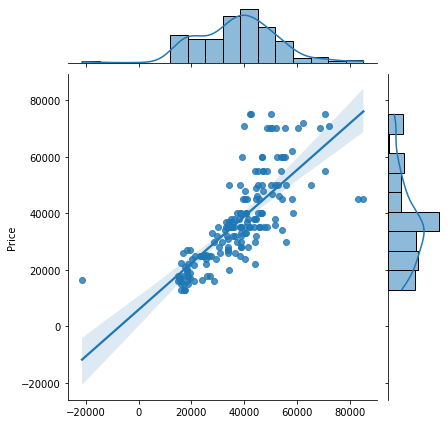

In [26]:
sns.jointplot(x=val_pred,y=y_val, kind='reg');

### K-fold on all three models

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=7)
# cross validation using r2 score
cross_val_score(lm, X, y, cv=kf, scoring='r2')

array([0.53496298, 0.67175447, 0.60192221, 0.67005063, 0.6658005 ,
       0.6583713 , 0.58003254, 0.6035071 , 0.5088353 , 0.50736544])

In [28]:
lm_score = cross_val_score(lm, X, y, cv=kf, scoring='r2')
print(f'Mean: {np.mean(lm_score)}, Standard deviation: {lm_score.std()}')

Mean: 0.6002602471423524, Standard deviation: 0.06271260360697739


In [29]:
# Use Ridge cross validation and score on validation set
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=10).fit(X, y)
ridge.score(X_val, y_val)

0.6840431480217644

## Ridge Regression

In [30]:
cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')

array([0.53572727, 0.67046923, 0.60067204, 0.66890226, 0.66470403,
       0.65905024, 0.58737685, 0.60562646, 0.50894509, 0.50822022])

In [31]:
ridge_score = cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')
print(f'Mean: {np.mean(ridge_score)}, Standard deviation: {ridge_score.std()}')

Mean: 0.6009693686658318, Standard deviation: 0.0619794651557345


In [32]:
# Use Ridge cross validation and score on validation set
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=10).fit(X, y)
ridge.score(X_val, y_val)

0.6840431480217644

### Polynomial Regression

In [33]:
cross_val_score(lm_poly, X, y, cv=kf, scoring='r2')

array([0.53496298, 0.67175447, 0.60192221, 0.67005063, 0.6658005 ,
       0.6583713 , 0.58003254, 0.6035071 , 0.5088353 , 0.50736544])

In [34]:
def create_polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly = LinearRegression()
    score = cross_val_score(poly, X_poly, y, cv=kf)
    return score
                            
poly_cv = []
degree = []
for i in range(1,5):
    poly_cv.append(create_polynomial_regression_model(i))
    degree.append(i)

for k in range(len(poly_cv)):
    print(f"Mean of degree {degree[k]}: {np.mean(poly_cv[k])}, Standard deviation: {np.std(poly_cv[k])}")

Mean of degree 1: 0.6002602471423524, Standard deviation: 0.06271260360697734
Mean of degree 2: 0.543076519505133, Standard deviation: 0.30750978855432887
Mean of degree 3: -3.275314671081288e+20, Standard deviation: 6.212670652843542e+20
Mean of degree 4: -1.971159130401424e+18, Standard deviation: 4.61314871387027e+18
